# Barske Pump Off-Performance Modelling

> Date:

> Author: Elias Aoubala

In [5]:
from turborocket.transient.start_up import Pump, Turbine, GasGenerator
from turborocket.characteristic.turbo_characteristic import TurboCharacteristics
from turborocket.fluids.fluids import IncompressibleFluid
import numpy as np
import handcalcs.render
import CoolProp.CoolProp as CP

import matplotlib.pyplot as plt

## 1 - Background

This document contains the authors modelling of the nominal performance for Barske Hydraulic Partial Emission Pumps.

## 2 - Expected Off-Nominal Performance

U.M. Barske in his paper `The Design of Open Impeller Centrifugal Pumps` had presented the following plot for the off nominal performance of the barske type pump.

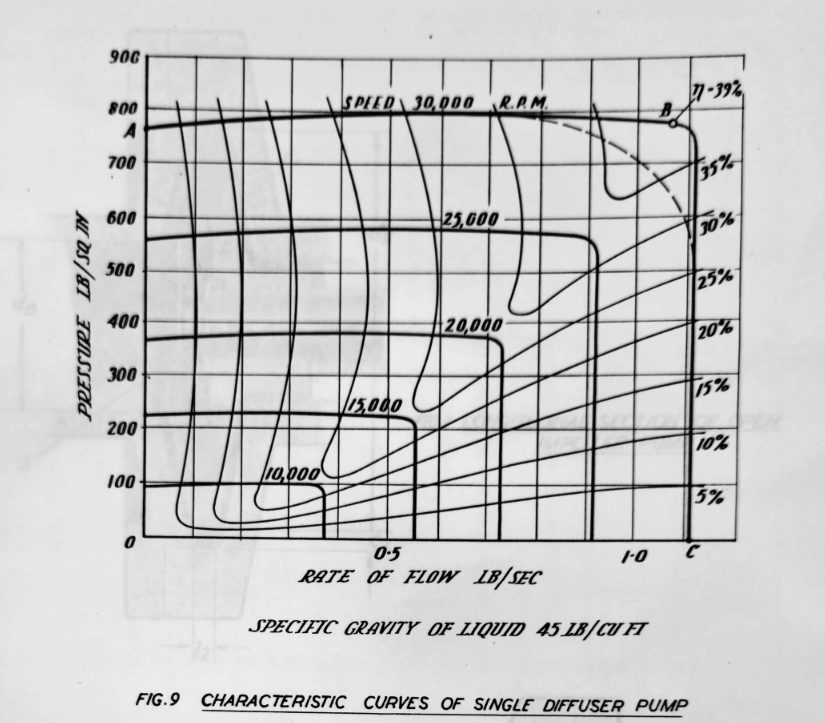

The following observations can be made for the characteristics of the pump:

- The head has little to know depedency on flow rate, with the shut off head remaining approximately constant.
- The efficiency for a given shaft speed is approximately linear with flow rate
- the maximum efficiency point of is approximately linear with shaft speed.

Based on these observations, we can make the following relationships.

The pump head is constant with the shut off head of the pump

$$H = H_o$$

The best efficiency point of the pump is the following:

$$\eta_{bep} = \eta_{max} \frac{N}{N_{max}}$$

The specific effiency is the following:

$$\eta = \eta_{bep} \frac{Q}{Q_{max}}$$

We know that the hydraulic power of the pump is the following:

$$P_{h} = \rho g H Q$$

And that the shaft power is the following:

$$P_{shaft} = \frac{P_{h}}{\eta}$$

We can substitude our definition for the effiency to get the following:

$$P_{shaft} = \frac{P_{h}}{\eta_{bep}} \frac{Q_{max}}{Q}$$

Substituting for our efficiency of the best operating point:

$$P_{shaft} = \frac{P_{h}}{\eta_{max}} \frac{Q_{max}}{Q} \frac{N_{max}}{N}$$

Substituing for our definition of hydraulic power, we get the following:

$$P_{shaft} = \frac{\rho g H_o}{\eta_{max}} \frac{Q_{max} N_{max}}{N} $$

Grouping our terms, we get the following:

$$P_{shaft} = \rho g H_o Q_{max} \frac{N_{max}}{N\eta_{max}} $$

We can rought the product of the shutt of head and Q_max to be in the form of the stock power to get the following:

$$P_{shaft} = \rho g H_o Q_{max} \frac{N_{max}}{N\eta_{max}} $$

$$P_{shaft} = P_{max}\frac{N_{max}}{N\eta_{max}} $$

Finally, we know that the shaft power is the product of the torque and shaft speed, hence we can get the following relationship for the torque:

$$\tau N = P_{max}\frac{N_{max}}{N\eta_{max}} $$

$$\tau = P_{max}\frac{N_{max}}{N^2 \eta_{max}} $$

We can go further and derive an expression for P_max in explicit terms with the efficienc, to get the following:

$$P_{max} = \rho g H_o Q_{max}$$

The shut off head is the following:

$$H_o = \frac{1}{2 g} (2 u_2^2 - u_1^2)$$

The maximum flow rate is the following

$$Q_{max} = A \sqrt{2 u_2^2 - u_1^2}$$

Hence we can do the following:

$$P_{max} = \frac{\rho A}{2} (2 u_2^2 - u_1^2) \sqrt{2 u_2^2 - u_1^2}$$

We can assume that u_1 is small, hence we get the following parameter:

$$P_{max} = \sqrt{2}\rho A u_2^3 $$

We know that the exit whirl velocity is a product of the shaft speed and diameter of the pump:

$$u_2 = N \frac{D_2}{2}$$

Hence we get the following expression:

$$P_{max} = \frac{\sqrt{2}}{8}\rho A (N D_2)^3 $$




We can substitute this expresison for the torque equation to get the following:

$$\tau = \frac{\sqrt{2}}{8}\rho A (N D_2)^3\frac{N_{max}}{N^2 \eta_{max}} $$

Simplifying and gathering parameters

$$\tau = \frac{\sqrt{2}}{8} (\frac{\rho A N_{max}}{\eta_{max}}) N D_2^3 $$

we can re introduce our slip factor here to get the following:

$$\tau = \frac{\sqrt{1 - \psi}}{8} (\frac{\rho A N_{max}}{\eta_{max}}) N D_2^3 $$

## 3 - Pump contour plot

In [6]:
pump = Pump(D_1 = 3e-2,
            D_2 = 5e-2,
            D_3 = 8e-2)

pump.set_performance(C_c=0.95, psi=0.2, eta_bep=0.4, N_nom=25e3 * (2 * np.pi) / 60)

inlet = IncompressibleFluid(rho=1000, P=30e5, mue=2.86e-3)
k1 = 100
k2 = 100

N = np.linspace(100, 30e3, k1)*(2*np.pi)/60


m_dot = np.linspace(0, 10, k2)

N, m_dot = np.meshgrid(N, m_dot)


dp = np.zeros([k2, k1])
torque = np.zeros([k2, k1])
eta = np.zeros([k2, k1])


i = 0
for Ne in N:

    j = 0
    for m in m_dot[i,:]:
        m = m_dot[i,j]
        ne = N[i, j]

        dp[i, j] = (
            pump.get_exit_condition(inlet=inlet, N=ne, m_dot=m).get_pressure()
            - inlet.get_pressure()
        )

        torque[i, j] = pump.get_torque(inlet=inlet, N=ne)

        eta[i, j] = pump.get_eta(Q=m / 1000, N = ne, fluid=inlet)

        j +=1

    i +=1

fig, ax = plt.subplots(2,2, sharex=True)
fig.set_size_inches(18.5, 10.5)
ax[0][0].plot(m_dot, dp)
ax[0][0].set_ylabel("Pump Head (n.d)")
ax[0][0].set_title("Expected Pump performance Maps")


ax[1][0].plot(m_dot, torque)
ax[1][0].set_ylabel("Torque (n.d)")
ax[1][0].set_xlabel("Mass Flow (n.d)")


ax[0][1].plot(m_dot, eta)
ax[0][1].set_ylabel("Efficiency")
ax[0][1].set_title("Expected Pump performance Maps")


ax[1][1].plot(m_dot, torque)
ax[1][1].set_ylabel("Torque (n.d)")
ax[1][1].set_xlabel("Mass Flow (n.d)")
# plt.plot(m_dot, dp)

TypeError: Pump.get_eta_bep() missing 1 required positional argument: 'N'

In [ ]:
pump.get_eta(N=25e3 * (2 * np.pi) / 60, Q=0.008)

0.3549875801560423

<a list of 9 text.Text objects>

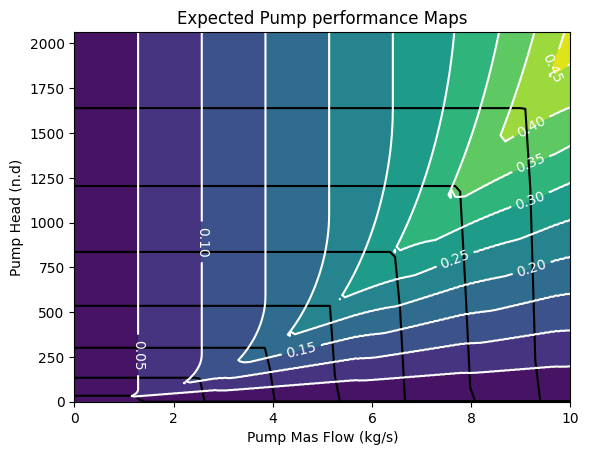

In [ ]:
fig.set_size_inches(18.5, 10.5)
plt.contour(m_dot, dp, N, colors="k")
plt.ylabel("Pump Head (n.d)")
plt.xlabel("Pump Mas Flow (kg/s)")
plt.title("Expected Pump performance Maps")
k = plt.contourf(m_dot, dp, eta, levels =10)

k2 = plt.contour(m_dot, dp, eta, colors="white", levels=10)


plt.clabel(k2, k2.levels)